# Работа с данными

## О распределении в целом

Вообще говоря, экспоненциальное распределение очень связано с распределением Пуассона. Поэтому, выбирая данные, нужно обратить внимание на то, является ли изучаемый процесс пуассоновским. Что значит пуассоновский процесс? Пуассоновский процесс это такая модель, при которой:
- последовательность случайных событий происходит с какой-то постоянной интенсивностью
- все события являются независимыми

В "Домашней работе 1" я объяснял связь между распределением Пуассона и показательным распределением, но можно проиллюстрировать ее и здесь. По своему смыслу экспоненциальная модель это распределение вероятностей времени между возникновениями каких-то событий в пауссоновском процессе. То есть оно отвечает на вопрос, с какой вероятностью данное событие произойдет в какой-то отрезок времени. Пойдем от обратного и зададимся таким вопросом, а в течении какого времени событие **не** произойдет? На сколько нам известно, отсутствие какого-то события это Пуассоновская модель при $\xi=0$, то есть если $P(\xi=k)=\frac{\lambda^k e^{-\lambda}}{k!}$, то $P(\xi=0)=\frac{\lambda^0 e^{-\lambda}}{0!}=e^{-\lambda}$. Это значение верно только для одного временного юнита. Если мы хотим узнать вероятность *P(ничего не происходит в течении времени t)*, то нам нужно сделать следующее:

$$P(\mbox{ничего не происходит в течении t})=P(\mbox{ничего не происходит за 1-й юнит})\cdot P(\mbox{ничего не происходит за 2-й юнит})\cdot \dots \cdot P(\mbox{ничего не происходит за t-й юнит})=e^{-\lambda}\cdot e^{-\lambda} \cdot \dots \cdot e^{-\lambda}=e^{-\lambda t}$$

Таким образом мы получили $P(T > t)$, где $T$ - случайная величина, а сама вероятность по смыслу - вероятность того, что время ожидания возникновения события будет больше $t$. А нас интересует как раз-таки обратное, то есть $P(T \leq t)=1-e^{-\lambda t}$. Вот мы и получили CDF нашего показательного распределения, чтобы получить PDF нам нужно продифференцировать CDF: $\frac{d}{dt}(1-e^{-\lambda t})=\lambda e^{-\lambda t}$

Также стоит отметить, что $\lambda_{poiss}$ связана с $\lambda_{exp}$. По смыслу $\lambda_{poiss}$ является интенсивностью. Грубо говоря, за определенный отрезок времени какое-то событие в среднем происходит $\lambda_{poiss}$ раз. $\lambda_{exp}$ напротив, отвечает на вопрос, за какое время произойдет одно событие. То есть $\lambda_{exp}=\frac{1}{\lambda_{poiss}}$

Подытожим, экспоненциальное распределение говорит нам о вероятности возникновения какого-то события в неком промежутке времени. Для работы нам нужно правильно выбрать данные, они должны быть из пауссоновского процесса, то есть события должны быть независимы друг от друга и происходить с некой интенсивностью.

## О данных которые будем исследовать

Когда речь идет о процессах, которые происходят с некой интенсивностью, на ум сразу приходят отрасли, в которых процесс поставлен на "поток". Будь-то промышленность, транспорт, вычислительная техника(серверы), отели, кафе и так далее. Для своей работы я решил взять довольно крупный датасет о трафике различных аэропортов в Америке. Данный были взяты [с этого сайта](https://www.kaggle.com/giovamata/airlinedelaycauses). В датасете есть данные о времени и датах вылета самолетов из различных аэропортов. За процесс возьмем наблюдение вылетов самолетов из какого-то аэропорта. Очевидно, что у данного наблюдения будет некая интенсивность. Зададимся вопросом, если мы наблюдаем за вылетом самолетов, и только что взлетел самолет "A", какова вероятность, что следующий самолет "B" вылетит в промежуток времени t. Для того чтобы ответить на этот вопрос, нам надо взять выборку и посмотреть, как она будет распределена. Имея данные о времени взлета, мы можем расположить их в порядке возрастания и взять разницу между каждыми двумя взлетами самолетов и посмотреть как будет распределена эта разница. Код python ниже помогает сгенерировать массив разницы времени между двумя взлетами (delta) для двух аэропортов (Los Angeles International Airport, McCarran International Airport). После получение массива delta, код генерирует график распределения.

LAX
[34.0, 15.0, 26.0, 22.0, 19.0, 254.0, 9.0, 11.0, 19.0, 30.0, 12.0, 8.0, 16.0, 10.0, 6.0, 5.0, 3.0, 4.0, 17.0, 28.0, 16.0, 3.0, 12.0, 4.0, 4.0, 2.0, 3.0, 7.0, 2.0, 2.0, 8.0, 15.0, 4.0, 5.0, 4.0, 2.0, 7.0, 3.0, 7.0, 2.0, 4.0, 4.0, 17.0, 8.0, 2.0, 5.0, 4.0, 5.0, 4.0, 2.0, 6.0, 23.0, 3.0, 3.0, 2.0, 2.0, 5.0, 4.0, 13.0, 4.0, 10.0, 2.0, 4.0, 3.0, 2.0, 10.0, 2.0, 8.0, 4.0, 10.0, 3.0, 4.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 8.0, 11.0, 16.0, 2.0, 3.0, 3.0, 3.0, 18.0, 6.0, 2.0, 3.0, 5.0, 21.0, 4.0, 9.0, 3.0, 2.0, 8.0, 2.0, 2.0, 3.0, 7.0]


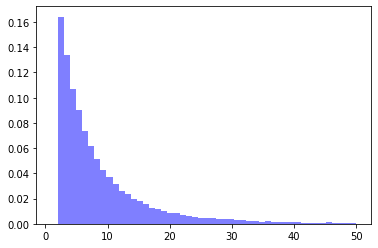

LAS
[3.0, 4.0, 3.0, 2.0, 5.0, 4.0, 5.0, 8.0, 4.0, 2.0, 10.0, 24.0, 115.0, 167.0, 16.0, 92.0, 5.0, 25.0, 11.0, 11.0, 20.0, 11.0, 17.0, 5.0, 12.0, 7.0, 13.0, 5.0, 3.0, 8.0, 11.0, 3.0, 5.0, 13.0, 10.0, 9.0, 7.0, 7.0, 3.0, 9.0, 6.0, 2.0, 6.0, 8.0, 3.0, 14.0, 33.0, 3.0, 4.0, 2.0, 2.0, 17.0, 7.0, 4.0, 3.0, 34.0, 12.0, 11.0, 15.0, 3.0, 9.0, 2.0, 2.0, 4.0, 4.0, 3.0, 9.0, 7.0, 8.0, 3.0, 7.0, 4.0, 2.0, 5.0, 2.0, 5.0, 11.0, 4.0, 4.0, 8.0, 2.0, 5.0, 3.0, 3.0, 3.0, 2.0, 2.0, 6.0, 13.0, 4.0, 6.0, 4.0, 5.0, 3.0, 8.0, 2.0, 3.0, 7.0, 2.0, 11.0]


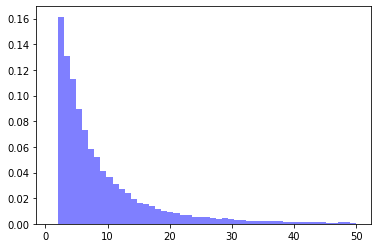

In [56]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

def distrib(airport):
    airport = airport
    with open('DelayedFlights.csv') as f:
        csv_reader = csv.DictReader(f, delimiter=',')
        clean_l = []
        # clear unnecessary data
        for row in csv_reader:
            clean_l.append([row["Year"],
                            row["Month"],
                            row["DayofMonth"],
                            int(float(row["DepTime"])),
                            row["Origin"]])

    # getting information for specific airport
    clean_l = [l[:4] for l in clean_l if l[4]==airport]

    # changing format of date and time and appending it as datetime object
    for i in range(len(clean_l)):
        sublist = clean_l[i]
        time = '%04d' % sublist[3]
        if time == '2400': time = '0000'
        clean_l[i] = datetime(int(sublist[0]), int(sublist[1]), int(sublist[2]), int(time[:2]), int(time[2:]))

    clean_l.sort()

    # creating a delta-time list
    delta = []
    for i in range(1, len(clean_l)):
        delta.append((clean_l[i]-clean_l[i-1]).total_seconds()//60)
    delta.insert(0, clean_l[0].minute//60)
    delta = list(filter(lambda x: x > 1, delta))
    #making a graph and printing results
    print(airport)
    print(delta[:100])
    num_bins = 50
    n, bins, patches = plt.hist(delta, num_bins, facecolor='blue', alpha=0.5, range=[1,50], density=True)
    #x = np.linspace(2,50,10)
    #plt.plot(x, y:=(0.16)*np.exp((-0.16)*x),'b')
    plt.show()
    return delta
delta1 = distrib("LAX")
delta2 = distrib("LAS")

## Исследование данных

Очевидно, что данные выборки подчиняется экспоненциальному распределению. Можем провести некоторое исследование.

### Выборочное среднее

Выборочное среднее вычисляется по формуле: $\overline X=\frac{1}{n}\sum_1^n X_i$. Вычислим его для наших выборок.

In [51]:
def sample_mean(delta):
    sum = 0
    for i in delta:
        sum += i
    return(sum/len(delta))

print("LAX sample mean =", sample_mean(delta1))
print("LAS sample mean =", sample_mean(delta2))

LAX sample mean = 11.545258092543499
LAS sample mean = 12.722006964539704


### Выборочная дисперсия

Выборочная дисперсия вычисляется по формуле $S_0^2=\frac{1}{n}\sum_1^n (X_i-\overline X)^2$. Вычислим для наших выборок.

In [57]:
def sample_disp(delta):
    mean = sample_mean(delta)
    sum = 0
    for i in delta:
        sum += (i-mean)**2
    return(sum/len(delta))

print("LAX sample disp =", sample_disp(delta1))
print("LAS sample disp =", sample_disp(delta2))

LAX sample disp = 821.3647561250149
LAS sample disp = 1130.6909772660101


### Оценка

Из прошлой домашней работы нам известно, что для показательного распределения можно получить оценку методом максимального правдоподобия. Для параметрической функции $\tau(\theta)=\frac{1}{\theta}$, оценка будет выглядеть так: $\hat{\theta}=\frac{1}{\overline X}$, получим ее из нашей выборки:

In [58]:
print("Theta for LAX is", 1/sample_mean(delta1))
print("Theta for LAS is",1/sample_mean(delta2))

Theta for LAX is 0.08661564704611062
Theta for LAS is 0.07860395005185261
